In [6]:
pip install mysql-connector-python


   ---------------------------------------- 0.0/14.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.3 MB 163.8 kB/s eta 0:01:28
   ---------------------------------------- 0.0/14.3 MB 196.9 kB/s eta 0:01:13
   ---------------------------------------- 0.1/14.3 MB 233.8 kB/s eta 0:01:02
   ---------------------------------------- 0.1/14.3 MB 255.1 kB/s eta 0:00:56
   ---------------------------------------- 0.1/14.3 MB 255.1 kB/s eta 0:00:56
   ---------------------------------------- 0.1/14.3 MB 297.7 kB/s eta 0:00:48
   ---------------------------------------- 0.1/14.3 MB 288.1 kB/s eta 0:00:50
   ---------------------------------------- 0.1/14.3 MB 315.4 kB/s eta 0:00:46
   ---------------------------------------- 0.2/14.3 MB 317.5 kB/s eta 0:00:45
    --------------------------------------- 0.2/14.3 MB 347.1 kB/s eta 0:00:41



[notice] A new release of pip is available: 23.3.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'sellers'),
    ('products.csv', 'products'),
    ('geolocation.csv', 'geolocation'),
    ('payments.csv', 'payments'),
    ('order_items.csv','order_items')# Added payments.csv for specific handling
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='RKC123',
    database='ecommerce'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = 'C:/Users/lenovo/Desktop/project e com/archive'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector


db = mysql.connector.connect(host ="localhost",username="root",
                            password ="RKC123",
                            database = "ecommerce")

cur = db.cursor()


# 1. List all unique cities where customers are located.


In [2]:
quary ="""select distinct customer_city from customers"""
cur.execute(quary)

data=cur.fetchall()
df = pd.DataFrame(data)
df.head()

,0
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas


# 2. Count the number of orders placed in 2017.


In [3]:
query = """ select count(order_id) from orders where year(order_purchase_timestamp)=2017 """
cur.execute(query)
data = cur.fetchall()
"total orders placed in 2017 are ",data [0][0]

('total orders placed in 2017 are ', 90202)

# 3. Find the total sales per category.


In [4]:
query = """ select upper(products.product_category) category,
round(sum(payments.payment_value),2)
sales from products  join order_items
on products.product_id =order_items.product_id 
join payments 
on payments.order_id = order_items.order_id
group by  category"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns=["catogery","sales"]) 
df


,catogery,sales
0,PERFUMERY,4053909.28
1,FURNITURE DECORATION,11441411.13
2,TELEPHONY,3895056.41
3,FASHION BAGS AND ACCESSORIES,1745266.24
4,BED TABLE BATH,13700429.37
...,...,...
69,CDS MUSIC DVDS,9595.44
70,LA CUISINE,23308.24
71,FASHION CHILDREN'S CLOTHING,6285.36
72,PC GAMER,17395.44


# 4. Calculate the percentage of orders that were paid in installments.


In [5]:
query = """ select (sum(case when payment_installments >= 1 then 1 else 0 end))/count(*)*100 from payments"""
cur.execute(query)
data = cur.fetchall()
"thepercentage of order that were paid in installments is",data[0][0]


('thepercentage of order that were paid in installments is',
 Decimal('99.9981'))

# 5. Count the number of customers from each state. 


In [6]:
import pandas as pd

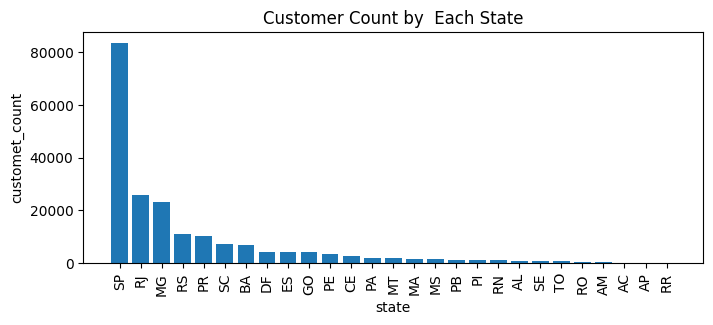

In [7]:
query = """select customer_state,count(customer_id) 
from customers group by customer_state"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns =["state","customet_count"])
df=df.sort_values(by ="customet_count",ascending =False)
plt.figure(figsize =(8,3))
plt.bar(df["state"],df["customet_count"])
plt.xticks(rotation =90)

plt.title('Customer Count by  Each State')
plt.xlabel('state')
plt.ylabel('customet_count')

plt.show()


# 2.1. Calculate the number of orders per month in 2018.


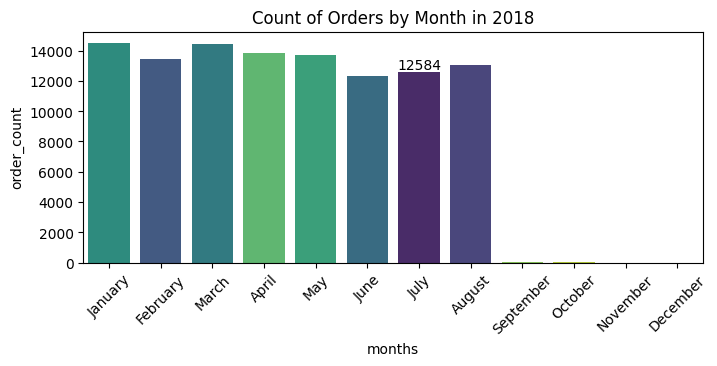

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

query = """
SELECT MONTHNAME(order_purchase_timestamp) AS months, COUNT(order_id) AS order_count
FROM orders
WHERE YEAR(order_purchase_timestamp) = 2018
GROUP BY months
"""
cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data, columns=["months", "order_count"])

months_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]
plt.figure(figsize =(8,3))
ax = sns.barplot(x="months", y="order_count", data=df, order=months_order,hue=df["months"], palette="viridis")
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0])
plt.title("Count of Orders by Month in 2018")
plt.show()


# 2 2. Find the average number of products per order, grouped by customer city.


In [9]:
query = """
with count_per_order as
(SELECT orders.order_id,orders.customer_id,count(order_items.order_id) as oc
from orders join order_items
on orders.order_id = order_items.order_id
group by orders.order_id, orders.customer_id)

select customers.customer_city,round(avg(count_per_order.oc),2)average_orders
from customers join count_per_order
on customers.customer_id = count_per_order.customer_id
group by customers.customer_city;
"""
cur.execute(query)
data = cur.fetchall()
df =pd.DataFrame(data)
df.head(10)

,0,1
0,sao jose dos campos,4.55
1,indaial,4.46
2,treze tilias,5.09
3,sao paulo,4.62
4,rio de janeiro,4.59
5,mario campos,5.33
6,guariba,4.00
7,cuiaba,4.79
8,franca,5.01
9,tocos,4.00


# 2.3. Calculate the percentage of total revenue contributed by each product category.


In [10]:
query = """
SELECT 
    UPPER(products.product_category) AS category, 
    round((SUM(payments.payment_value) / (SELECT SUM(payment_value) FROM payments)) * 100,2) AS sales_percentage
FROM 
    products
JOIN 
    order_items ON products.product_id = order_items.product_id
JOIN 
    payments ON payments.order_id = order_items.order_id
GROUP BY category order by sales_percentage asc;

"""
cur.execute(query)
data = cur.fetchall()
df =pd.DataFrame(data,columns = ["catogary","percentage distribution"])
df.head(10)

,catogary,percentage distribution
0,INSURANCE AND SERVICES,0.01
1,FASHION CHILDREN'S CLOTHING,0.02
2,CDS MUSIC DVDS,0.03
3,HOUSE COMFORT 2,0.04
4,PC GAMER,0.05
5,ARTS AND CRAFTS,0.06
6,FLOWERS,0.06
7,LA CUISINE,0.07
8,FASHION SPORT,0.09
9,KITCHEN PORTABLE AND FOOD COACH,0.11


# 2.4. Identify the correlation between product price and the number of times a product has been purchased.


In [11]:
import numpy as np
query = """
select products.product_category,
count(order_items.product_id),
round(avg(order_items.price),2)
from products join order_items
on products.product_id = order_items.product_id
group by products.product_category;
"""
cur.execute(query)
data = cur.fetchall()
df =pd.DataFrame(data,columns = ["catogary","order_count","price"])
df.head(10)


,catogary,order_count,price
0,HEALTH BEAUTY,38680,130.16
1,sport leisure,34564,114.34
2,Cool Stuff,15184,167.36
3,computer accessories,31308,116.51
4,Watches present,23964,201.14
5,housewares,27856,90.79
6,electronics,11068,57.91
7,None,6412,112.00
8,toys,16468,117.55
9,bed table bath,44460,93.30


In [12]:
arr1=df["order_count"]
arr2=df["price"]
a=np.corrcoef(arr1,arr2)
print("the correlation is ",a[0] [-1])

the correlation is  -0.10631514167157562


# 2.5. Calculate the total revenue generated by each seller, and rank them by revenue.


C:\Users\lenovo\AppData\Local\Temp\ipykernel_6296\2807751822.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="seller_id", y="revenue", data=df, palette=palette)


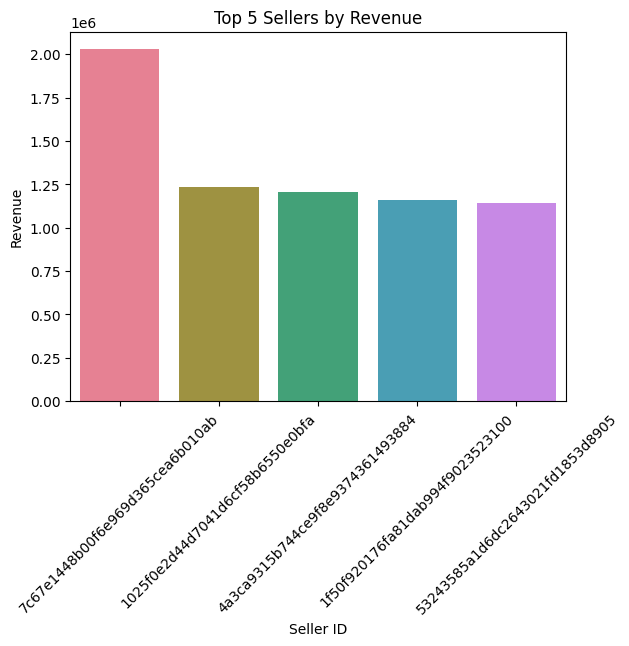

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Your SQL query and fetching data
query = """
SELECT *,
       DENSE_RANK() OVER (ORDER BY revenue DESC) AS rn
FROM (
    SELECT order_items.seller_id,
           SUM(payments.payment_value) AS revenue
    FROM order_items
    JOIN payments ON order_items.order_id = payments.order_id
    GROUP BY order_items.seller_id
) AS a
"""
cur.execute(query)
data = cur.fetchall()

# Creating DataFrame
df = pd.DataFrame(data, columns=["seller_id", "revenue", "rank"])
df = df.head(5)

# Plotting with different colors
palette = sns.color_palette("husl", len(df))  # "husl" palette for different colors
sns.barplot(x="seller_id", y="revenue", data=df, palette=palette)

# Customizing the plot
plt.xticks(rotation=45)
plt.xlabel('Seller ID')
plt.ylabel('Revenue')
plt.title('Top 5 Sellers by Revenue')

# Displaying the plot
plt.show()


# Advanced Queries
# 3.1. Calculate the moving average of order values for each customer over their order history.

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector


db = mysql.connector.connect(host ="localhost",username="root",
                            password ="RKC123",
                            database = "ecommerce")

cur = db.cursor()


In [15]:
query = """

select customer_id,order_purchase_timestamp,
avg(payment) over (partition by customer_id order by order_purchase_timestamp
rows between 2 preceding  and current row ) as mov_avg
from 
(select orders.customer_id,orders.order_purchase_timestamp,
payments.payment_value as payment
from payments join orders
on payments.order_id = orders.order_id) as a ;
"""
cur.execute(query)
data = cur.fetchall()
df=pd.DataFrame(data)
df


,0,1,2
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.739998
1,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.739998
2,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.739998
3,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.739998
4,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.410004
...,...,...,...
415539,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.500000
415540,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.370001
415541,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.370001
415542,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.370001


# 3.2. Calculate the cumulative sales per month for each year.


In [16]:

query ="""select years,months,sum(payment)
over(order by years,months) cumulative_sales from 
(select year(orders.order_purchase_timestamp)as years,
month(orders.order_purchase_timestamp) as months,
round(sum(payments.payment_value),2) as payment from orders join payments 
 on orders.order_id =payments.order_id
 group by years,months order by years,months) as a;

"""
cur.execute(query)
data = cur.fetchall()
df=pd.DataFrame(data,columns=["years","monts","cumulative_sales"])
df.head(10)

,years,monts,cumulative_sales
0,2016,9,1008.96
1,2016,10,237370.88
2,2016,12,237449.36
3,2017,1,791401.52
4,2017,2,1959033.56
5,2017,3,3758487.96
6,2017,4,5429640.08
7,2017,5,7801315.36
8,2017,6,9846420.88
9,2017,7,12215952.56


# 3 3. Calculate the year-over-year growth rate of total sales.


In [17]:

query ="""with a as (select year(orders.order_purchase_timestamp)as years,
round(sum(payments.payment_value),2) as payment from orders join payments 
 on orders.order_id =payments.order_id
 group by years order by years)

select years,((payment-lag(payment,1)over(order by years))/lag(payment,1) over (order by years)) * 100 from a
"""
cur.execute(query)
data = cur.fetchall()
df=pd.DataFrame(data,columns=["years","yoy %  growth"])
df.head(10)

,years,yoy % growth
0,2016,NaN
1,2017,12112.703757
2,2018,20.000924


# 3.5. Identify the top 3 customers who spent the most money in each year.



In [26]:

query ="""
select years,customer_id,payment,d_rank
from 
(select year(orders.order_purchase_timestamp)years,
orders.customer_id,
sum(payments.payment_value)payment,
dense_rank()over(partition by year(orders.order_purchase_timestamp)
order by sum(payments.payment_value) desc)d_rank
from orders join payments
on payments.order_id = orders.order_id
group by year(orders.order_purchase_timestamp),
orders.customer_id) as a
where d_rank <= 3;
"""
cur.execute(query)
data = cur.fetchall()
df=pd.DataFrame(data,columns=["years","id","payment","d_rank"])
df.head(10)

,years,id,payment,d_rank
0,2016,a9dc96b027d1252bbac0a9b72d837fc6,5694.200195,1
1,2016,1d34ed25963d5aae4cf3d7f3a4cda173,5602.959961,2
2,2016,4a06381959b6670756de02e07b83815f,4911.120117,3
3,2017,1617b1357756262bfa56ab541c47bc16,54656.320312,1
4,2017,c6e2731c5b391845f6800c97401a43a9,27717.240234,2
5,2017,3fd6777bbce08a352fddd04e4a7cc8f6,26906.640625,3
6,2018,ec5b2ba62e574342386871631fafd3fc,29099.519531,1
7,2018,f48d464a0baaea338cb25f816991ab1f,27688.839844,2
8,2018,e0a2412720e9ea4f26c1ac985f6a7358,19237.759766,3


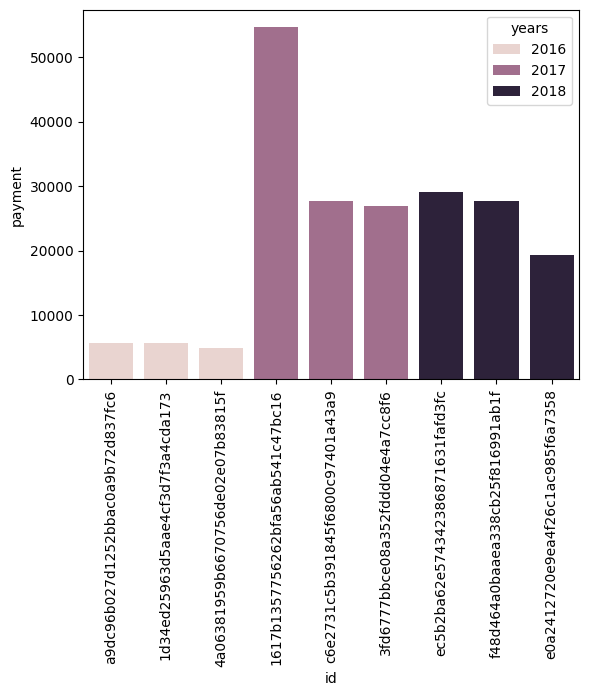

In [29]:
sns.barplot(x="id",y = "payment", data = df,hue="years")
plt.xticks(rotation = 90)
plt.show()

